<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/pid_NN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 19.8 MB/s 
     |████████████████████████████████| 182 kB 47.6 MB/s 
     |████████████████████████████████| 173 kB 54.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 168 kB 24.0 MB/s 
     |████████████████████████████████| 168 kB 11.6 MB/s 
     |████████████████████████████████| 166 kB 75.5 MB/s 
     |████████████████████████████████| 166 kB 64.2 MB/s 
     |████████████████████████████████| 162 kB 55.6 MB/s 
     |████████████████████████████████| 162 kB 12.2 MB/s 
     |████████████████████████████████| 158 kB 32.1 MB/s 
     |████████████████████████████████| 157 kB 68.2 MB/s 
     |████████████████████████████████| 157 kB 68.1 MB/s 
     |████████████████████████████████| 157 kB 58.2 MB/s 
     |████████████████████████████████| 157 kB 56.8 MB/s 
     |███████████████████████████

In [2]:
import pandas as pd
import os
import seaborn as sns
import wandb

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#user = "Anna"
user = "SL"
uzem = "Szint1"
data_source="5"
#fname="72C03_TC_error_toNN.csv"
fname_good = "415_SC_error_part1.csv"
fname_bad = "415_SC_error_part2.csv"

In [6]:
# Elérési út a 415_SC_error-hoz
if user=="Anna":
    path_good = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Datapipeline/plots/"
else:
    path_good = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_good
    path_bad = "/content/drive/MyDrive/2022Anna/Datapipeline/" + data_source + "/" + fname_bad
    path_fig = "/content/drive/MyDrive/2022Anna/Datapipeline/plots/"


In [7]:
print(path_good)
print(path_bad)

/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part1.csv
/content/drive/MyDrive/2022Anna/Datapipeline/5/415_SC_error_part2.csv


In [8]:
df_good = pd.read_csv(path_good,usecols=None)
df_bad = pd.read_csv(path_bad,usecols=None)

In [9]:
print(df_good.isnull().values.any())
print(df_bad.isnull().values.any())

False
False


In [10]:
df_good.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-54.810024,-80.342186,-60.770203,-41.081482,-21.779583,-3.82353,-0.806820,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875
1,-80.342186,-60.770203,-41.081482,-21.779583,-3.823530,-0.80682,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875,0.220875


In [11]:

import matplotlib.pyplot as plot

df_ = df_good

# You must normalize the data before applying the fit method
df_good_normalized=(df_ - df_.mean()) / df_.std()

# Normalize bad data with the good data parameters
df_bad_normalized=(df_bad - df_.mean()) / df_.std()

In [12]:
df_good_normalized["state"]=0
df_bad_normalized["state"]=1

In [13]:
df_good_normalized

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
0,-10.681306,-16.586266,-14.612051,-11.087981,-6.293341,-1.192618,-0.315574,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1,-15.654548,-12.549683,-9.889987,-5.905180,-1.164099,-0.314249,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
2,-11.842250,-8.489023,-5.260696,-1.083756,-0.302359,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
3,-8.007214,-4.508142,-0.954188,-0.273732,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
4,-4.247524,-0.804833,-0.230672,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1054,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1055,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0
1056,0.037801,0.029297,0.015806,0.002217,-0.008793,-0.015017,-0.016141,-0.016425,-0.016425,-0.016425,...,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,-0.016425,0


In [14]:
df_all_normalized=pd.concat([df_good_normalized,df_bad_normalized],axis=0)

In [15]:
df_all_normalized.tail()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,state
1263,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1264,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1265,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1266,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1
1267,0.029553,0.020564,0.005651,-0.009153,-0.020888,-0.027346,-0.028478,-0.028763,-0.028763,-0.028763,...,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,-0.028763,1


In [16]:
import wandb



In [46]:
_N1_=134
_N2_=15
_lr_=0.001
_batch_size_=1
_drop1_=0.5
_drop2_=0.1


In [47]:
config = {"lr": _lr_, "batch_size": _batch_size_,"architecture": "NN", 
          "depth": 2,
          "layer1":_N1_,  "layer2":_N2_, 
          "drop1":_drop1_,"drop2":_drop1_
          
          
          }

wandb.init(project="pid_1", entity="sipoczlaszlo",config=config)


epoch/accuracy,▁▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇██▇▇██████████
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▅▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▂▁
epoch/val_accuracy,▁▅▅▄▄▅▅▅▆▆▆▆▆▆▆▇▆▇▇▆▇▇▇▇▇█▇▇▇██▇████▇██▇
epoch/val_loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▁▂▁▁
epoch/accuracy,0.83184
epoch/epoch,367
epoch/learning_rate,0.001
epoch/loss,0.40587
epoch/val_accuracy,0.79042


In [48]:
from keras.engine.base_layer import regularizers
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD,Adam,Adamax,Nadam,Ftrl,Adadelta
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld
from sklearn.model_selection import train_test_split

clear_session()

kernel_reg_1=tf.keras.regularizers.L2(0.1)

input_size=20


input1=Input(shape=(input_size,))
l1_out=Dense(_N1_,activation="swish",kernel_initializer='glorot_uniform',)(input1) # kernel_initializer='lecun_normal'
l2_out=Dropout(_drop1_)(l1_out)


l3_out=Dense(_N2_,activation="swish",kernel_initializer='glorot_uniform',)(l2_out) #kernel_initializer='lecun_normal',
l4_out=Dropout(_drop2_)(l3_out)

pred=Dense(1, activation="sigmoid",)(l4_out)

model = Model(inputs=input1, outputs=pred)
optimizer=Adamax(learning_rate=_lr_,) #

model.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=["accuracy"])

In [49]:
# 35 5 1 relu relu sigmoid SGD 0.01 loss: 0.1402 - accuracy: 0.9435 - val_loss: 0.7302 - val_accuracy: 0.8548
# 35 12 1 relu relu sigmoid SGD 0.01 loss 0.1162 94.6% test : 85%
# 17 5 1 relu relu sigmoid SGD 0.01  loss: 0.1714 - accuracy: 0.9300 - val_loss: 0.9535 - val_accuracy: 0.8503
# 35 5 1 relu relu sigmoid Adam 0.01 loss: 0.1238 - accuracy: 0.9467 - val_loss: 5.7545 - val_accuracy: 0.8653
# 35 5 1 relu relu sigmoid Adamax 0.01 loss: 0.1184 - accuracy: 0.9525 - val_loss: 3.5327 - val_accuracy: 0.8428
# 35 5 1 relu relu sigmoid Adamax 0.001 loss: 0.1185 - accuracy: 0.9525 - val_loss: 2.3218 - val_accuracy: 0.8593
# 35 5 1 relu relu sigmoid Adamax 0.001 loss: 0.1041 - accuracy: 0.9576 - val_loss: 5.1465 - val_accuracy: 0.8353  +1300 epoch 
# 135 15 1 swish swish sigmoid Adamax 0.001 batch size:1 epoch 100 loss: 0.1707 - accuracy: 0.9352 - val_loss: 0.8066 - val_accuracy: 0.8892   **** egész jó



In [50]:
prediktorok=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19"]
X_NN=df_all_normalized[prediktorok][:-100]  # 
y_NN=df_all_normalized["state"][:-100]

In [51]:
model_file="model_PID__54_loss_0.116_vloss_0.115_acc_0.953_vacc_0.958.hdf5"
#model_file="model_PID__94_loss_0.116_vloss_0.115_acc_0.950_vacc_0.966.hdf5"

In [52]:
model_url="https://github.com/sipocz/pid_time_series/raw/main/model/"+model_file

In [53]:
__load_file__=False

In [54]:
if __load_file__:
    ! rm *.hdf5 
    ! wget $model_url
    model.load_weights(model_file)

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X_NN,y_NN,train_size=0.7,shuffle=True,)

In [56]:
!rm *.hdf5 

In [57]:
from wandb.keras import WandbMetricsLogger
fname="./model_PID_"
callbacks = [
        WandbMetricsLogger(),       
        ModelCheckpoint(filepath=fname+"_{epoch:03.0f}"+"_loss_{loss:.3f}_vloss_{val_loss:.3f}_acc_{accuracy:.3f}_vacc_{val_accuracy:.3f}.hdf5", monitor='loss',
                        verbose=2, save_best_only=True, mode='min')]


In [58]:
__learning__=True

In [59]:
if __learning__: 
    history = model.fit(X_train, y_train, epochs=500, batch_size=_batch_size_, validation_data=(X_test, y_test),verbose=1,callbacks=callbacks)


Epoch 1/500
1547/1558 [============================>.] - ETA: 0s - loss: 0.6357 - accuracy: 0.7020
Epoch 1: loss improved from inf to 0.63447, saving model to ./model_PID__001_loss_0.634_vloss_0.605_acc_0.702_vacc_0.725.hdf5
1558/1558 [==============================] - 9s 5ms/step - loss: 0.6345 - accuracy: 0.7015 - val_loss: 0.6046 - val_accuracy: 0.7246
Epoch 2/500
1556/1558 [============================>.] - ETA: 0s - loss: 0.5878 - accuracy: 0.7449
Epoch 2: loss improved from 0.63447 to 0.58765, saving model to ./model_PID__002_loss_0.588_vloss_0.591_acc_0.745_vacc_0.744.hdf5
1558/1558 [==============================] - 5s 3ms/step - loss: 0.5877 - accuracy: 0.7452 - val_loss: 0.5915 - val_accuracy: 0.7440
Epoch 3/500
1558/1558 [==============================] - ETA: 0s - loss: 0.5667 - accuracy: 0.7503
Epoch 3: loss improved from 0.58765 to 0.56672, saving model to ./model_PID__003_loss_0.567_vloss_0.588_acc_0.750_vacc_0.751.hdf5
1558/1558 [==============================] - 5s 3ms

In [60]:
y_pred=model.predict(X_test)

21/21 [==============================] - 0s 1ms/step


In [61]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
bina_transformer=Binarizer(threshold=0.5)
y_pred_transform=bina_transformer.fit_transform(y_pred)

In [64]:
cm=confusion_matrix(y_test,y_pred_transform)


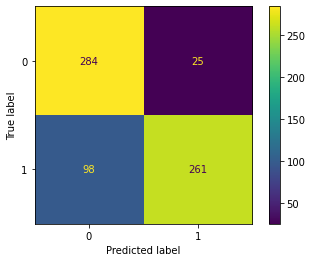

In [65]:
cm_display = ConfusionMatrixDisplay(cm).plot()

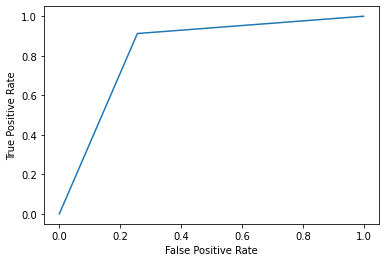

In [66]:
fpr, tpr, _ = roc_curve( y_pred_transform,y_test,pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
auc = roc_auc_score(y_test, y_pred_transform)

In [67]:
auc

0.8230566748699643

In [68]:
fpr

array([0.       , 0.2565445, 1.       ])

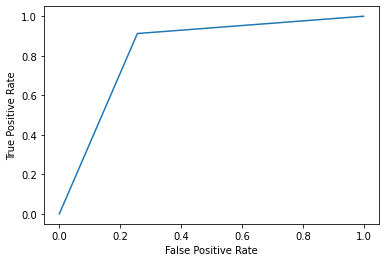

In [69]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
def grafikon3(fx,desc1,txt1,desc2="",txt2="",desc3="",txt3="",ngraf=2,c1='rgba(35,128,132,0.8)', c2='rgba(193,99,99,0.8)',c3='rgba(193,99,99,0.8)',title=None):
    '''
    fx: dataFrame
    desc1:column1
    txt1: label1
    desc2:column2
    txt2: label2
    ngraf: number of graph
    c1: color1
    c2: color2
    title: graph title
    '''
    
    #x_=[i for i in range(len(y_pred))]
    if title==None:
      title=txt1+" "+txt2
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    fig0 = make_subplots(specs=[[{"secondary_y": True}]])


    if ngraf>=3:
        fig0.add_trace(
            go.Bar(x=fx.index, y=fx[desc3], marker_color='rgba(225, 20, 20,0.2)',  name=txt3, showlegend=True, ),
              secondary_y=False,
            #row=1, col=1
        )


    if ngraf>=2:
        fig0.add_trace(
            go.Scatter(x=fx.index, y=fx[desc2], name=txt2, line=dict(color=c2) ,showlegend=True  ),
            secondary_y=False,
            #row=1, col=1

        )

    fig0.add_trace(
        go.Scatter(x=fx.index, y=fx[desc1], name=txt1, line=dict(color=c1) ,showlegend=True  ),
        secondary_y=False,
        #row=1, col=1

    )

    fig0.update_layout(
        title=title,
        autosize=False,
        width=1200,
        height=600,
        
        )

    print(title)
    fig0.update_yaxes(title_text="<b>"+title+"</b>", secondary_y=False)
    #fig0.update_yaxes(title_text="<b>Alarm státusz</b>", secondary_y=True)
    fig0.update_layout(paper_bgcolor='rgb(200,200,200)')
    fig0.show()

In [71]:

history_df=pd.DataFrame({"epoch":history.epoch, "loss":history.history["loss"],"val_loss":history.history["val_loss"]})

In [72]:
grafikon3(history_df,"loss","Loss","val_loss","Val_Loss",title=None)

Loss Val_Loss
